In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import stats

# 日本語文字化け対応
!pip install japanize_matplotlib
import japanize_matplotlib

In [2]:
N_default = 10000

### 連続一様分布 U(a, b) SciPy 


In [3]:
def uniform_ds(a = 0, b = 1, N = N_default):
    return stats.uniform.rvs(loc = a, scale = (b-a), size = N)

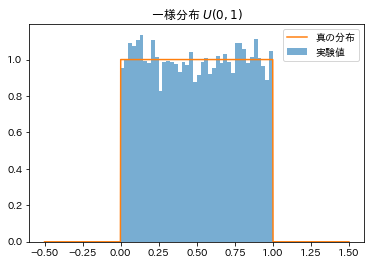

平均(実験値)	: 0.4985200325913485
平均(理論値)	: 0.5

分散(実験値)	: 0.08474351472701863
分散(理論値)	: 0.08333333333333333


In [4]:
# scipy.stats.uniform.pdf(x,loc=0, scale=1)
# scipy.stats.uniform.rvs(loc=1,scale=1,size=10000)
# 一様分布パラメータ U(a,b)
a = 0; b = 1
result_uniform = uniform_ds(a, b)
plt.hist(result_uniform, bins = 40, density=True, alpha=0.6, label="実験値")

x = np.linspace(a-0.5,b+0.5,1000)
pdf_uniform = stats.uniform.pdf(x,loc=a,scale=(b-a))
plt.plot(x, pdf_uniform, label="真の分布")

plt.title(r"一様分布 $U({}, {})$".format(a, b))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_uniform)))
print("平均(理論値)\t: {}".format((a+b)/2))
print()
print("分散(実験値)\t: {}".format(np.var(result_uniform)))
print("分散(理論値)\t: {}".format((b-a)**2/12))

### 指数分布 Exp(b) | 逆関数法

In [5]:
# 指数分布 Exp(b)
def exp_ds(b, N = N_default):
    y = -1.0 / float(b) * np.log(1.0-stats.uniform.rvs(size = N)) # uniform_ds(N = N) でも可
    return y

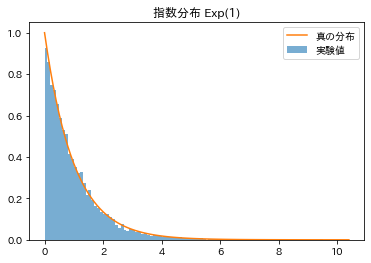

平均(実験値)	: 0.9874713009777828
平均(理論値)	: 1.0

分散(実験値)	: 0.9641810750812858
分散(理論値)	: 1.0


In [6]:
# 指数分布パラメータ
b = 1
result_exp = exp_ds(b)
X = np.arange(min(result_exp), max(result_exp), 0.1)
plt.hist(result_exp, bins=X, density=True, alpha=0.6, label="実験値")

exp_pdf = stats.expon.pdf(x=X, scale=1/b)
plt.plot(X, exp_pdf, label="真の分布")

plt.title(r"指数分布 Exp({})".format(b))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_exp)))
print("平均(理論値)\t: {}".format(1/b))
print()
print("分散(実験値)\t: {}".format(np.var(result_exp)))
print("分散(理論値)\t: {}".format(1/b**2))

### パレート分布 Pa(a,b)

In [7]:
# パレート分布 Pa(a, b)
def pa_ds(a, b, N = N_default):
    if not (a > 0 and b > 0):
        raise Exception("パレート分布 Pa(a, b) において a > 0 かつ b > 0")
    
    x = exp_ds(b = 1, N = N)
    y = b * np.e**(x/a)
    
    return y

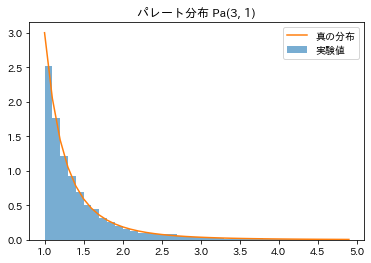

理論値において平均は パラメータ a > 1, 分散は パラメータ a > 2 のときのみ
平均(実験値)	: 1.5067062847536958
平均(理論値)	: 1.5

分散(実験値)	: 0.7699933250330663
分散(理論値)	: 0.75


In [8]:
# パレート分布パラメータ
a = 3; b = 1
result_pa = pa_ds(a, b)
X = np.arange(min(result_pa), 5, 0.1)
plt.hist(result_pa, bins=X, density=True, alpha=0.6, label="実験値")

pa_pdf = stats.pareto.pdf(x=X, b=a, scale=1/b)
plt.plot(X, pa_pdf, label="真の分布")

plt.title(r"パレート分布 Pa({}, {})".format(a, b))
plt.legend()
plt.show()

print("理論値において平均は パラメータ a > 1, 分散は パラメータ a > 2 のときのみ")
print("平均(実験値)\t: {}".format(np.mean(result_pa)))
print("平均(理論値)\t: {}".format(a*b/(a-1)))
print()
print("分散(実験値)\t: {}".format(np.var(result_pa)))
print("分散(理論値)\t: {}".format((a*b**2)/((a-1)**2*(a-2))))

### ガンマ分布 Gamma(a, b) | 棄却法

In [9]:
# ガンマ分布 Gamma(a, b)
def gamma_ds(a, b, N = N_default):
    # ガンマ関数のパラメータb 尺度母数の定義に注意
    
    if not (a > 0 and b > 0):
        raise Exception("ガンマ分布 gamma(a, b) において a > 0 かつ b > 0")
    
    # Gamma(a, b) = (1/b)*Gamma(a, 1) を利用

    y = np.empty(N)
    
    # a=1のときは指数分布(逆関数法)
    if a == 1:
        return exp_ds(b, N)
    
    elif a < 1: # a <= 1 でも可
        # Ahrens and Dieter (1974)
#         c = np.e /(a + np.e)
#         for i in range(N):
#             while True:
#                 u1 = stats.uniform.rvs() # uniform_ds(N = 1)
#                 u2 = stats.uniform.rvs()
#                 if u1 <= c:
#                     x = (u1/c)**(1.0/a)
#                     if u2 <= np.e**(-x):
#                         y[i] = x
#                         break
#                 else: # u1 > c
#                     x = -np.log((1-u1)/(c*a))
#                     if u2 <= x**(a-1):
#                         y[i] = x
#                         break
#         return y/b
        
        
        # Best (1983)
#         c1 = 0.07+0.75*np.sqrt(1-a);
#         c2 = 1+a*np.power(np.e,-c1)/c1
#         c3 = 1/a
#         for i in range(N):
#             while True:
#                 u1 = stats.uniform.rvs()
#                 u2 = stats.uniform.rvs()
#                 v = c2*u1
#                 if v <= 1:
#                     x = c1*np.power(v,c3)
#                     if u2 <= (2-x)/(2+x) or u2 <= np.power(np.e,-x):
#                         y[i] = x
#                         break
#                 else: # v > 1
#                     x1 = -np.log(c1*c3*(c2-v))
#                     x2 = x1/c1
#                     if u2*(a+x2-a*x2) <= 1 or u2 <= np.power(x2,a-1):
#                         y[i] = x1
#                         break
#         return y/b
        
        # Marsaglia and Tsang (2001)
        # 0 < a <= 1 においても a > 1 のアルゴリズムを使う方法
        # x*u^{1/a} ~ Gamma(a, b) ただし, x ~ Gamma(a+1, b), u ~ U(0,1)
        # 以下 Gamma(a+1, b) を a > 1 のアルゴリズムで生成
        c1 = a+1-1/3
        c2 = 1/np.sqrt(9*c1)
        for i in range(N):
            while True:
                z = stats.norm.rvs() # z = norm_ds_boxmuller(N = 1)
                if c2*z > -1:
                    v = np.power(1+c2*z,3)
                    u = stats.uniform.rvs()
                    if u < 1-0.031*np.power(z,4) or np.log(u) < 0.5*np.power(z,2)+c1*(1-v+np.log(v)):
                        y[i] = c1*v*np.power(stats.uniform.rvs(), 1/a)
                        break
        return y/b
    
    else: # a > 1
        # Cheng (1977)
#         c1 = 1/np.sqrt(2*a-1); c2 = a-np.log(4); c3 = a+np.sqrt(2*a-1); c4 = 1+np.log(4.5)
#         for i in range(N):
#             while True:
#                 u1 = stats.uniform.rvs()
#                 u2 = stats.uniform.rvs()

#                 y1 = c1 * np.log(u1/(1-u1))
#                 x = a * np.e**y1
#                 y2 = u1**2 * u2
#                 y3 = c2 + c3*y1 - x
#                 if y3 >= 4.5*y2 - c4 or y3 >= np.log(y2):
#                     y[i] = x
#                     break
        
        # Marsaglia and Tsang (2001)
        c1 = a-1/3
        c2 = 1/np.sqrt(9*c1)
        for i in range(N):
            while True:
                z = stats.norm.rvs() # z = norm_ds_boxmuller(N = 1)
                if c2*z > -1:
                    v = np.power(1+c2*z,3)
                    u = stats.uniform.rvs()
                    if u < 1-0.031*np.power(z,4) or np.log(u) < 0.5*np.power(z,2)+c1*(1-v+np.log(v)):
                        y[i] = c1*v
                        break
        return y/b

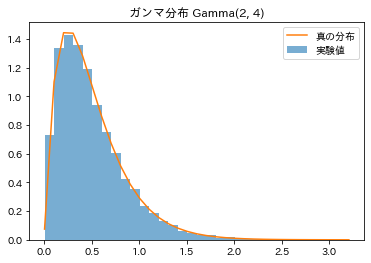

平均(実験値)	: 0.49610926733747235
平均(理論値)	: 0.5

分散(実験値)	: 0.12510265647439603
分散(理論値)	: 0.125


In [10]:
# ガンマ分布パラメータ
a = 2; b = 4
result_gamma = gamma_ds(a, b)
X = np.arange(min(result_gamma), max(result_gamma), 0.1)
plt.hist(result_gamma, bins = X, density=True, alpha=0.6, label="実験値")

gamma_pdf = stats.gamma.pdf(x=X, a=a, scale=1/b)
plt.plot(X, gamma_pdf, label="真の分布")

plt.title(r"ガンマ分布 Gamma({}, {})".format(a, b))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_gamma)))
print("平均(理論値)\t: {}".format(a/b))
print()
print("分散(実験値)\t: {}".format(np.var(result_gamma)))
print("分散(理論値)\t: {}".format(a/b**2))

#### ガンマ分布の再生性

$ Gamma(a1, b)+Gamma(a2, b) = Gamma(a1+a2, b) $

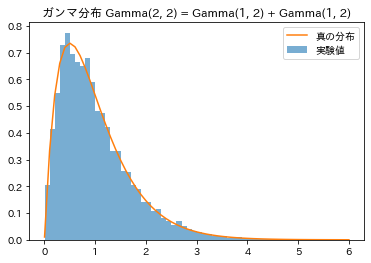

平均(実験値)	: 1.0099340730247137
平均(理論値)	: 1.0

分散(実験値)	: 0.518700376157581
分散(理論値)	: 0.5


In [11]:
# ガンマ分布パラメータ
a1 = 1; a2 = 1; b = 2
a = a1 + a2
result_gamma1 = gamma_ds(a1, b, N_default)
result_gamma2 = gamma_ds(a2, b, N_default)

result_gamma = result_gamma1 + result_gamma2
X = np.arange(min(result_gamma), max(result_gamma), 0.1)
plt.hist(result_gamma, bins=X, density=True, alpha=0.6, label="実験値")

gamma_pdf = stats.gamma.pdf(x=X, a = a, scale = 1/b)
plt.plot(X, gamma_pdf, label="真の分布")

plt.title(r"ガンマ分布 Gamma({}, {}) = Gamma({}, {}) + Gamma({}, {})".format(a, b, a1, b, a2, b))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_gamma)))
print("平均(理論値)\t: {}".format((a1+a2)/b))
print()
print("分散(実験値)\t: {}".format(np.var(result_gamma)))
print("分散(理論値)\t: {}".format((a1+a2)/b**2))

### ベータ分布 Beta(a, b)

In [12]:
# ベータ分布 Beta(p, q)
# ガンマ分布を利用
def beta_ds(a, b, N = N_default):
    if not (a > 0 and b > 0):
        raise Exception("ベータ分布 beta(a, b) において a > 0 かつ b > 0")
        
    if a == 1 and b == 1: # 一様分布になる
        return stats.uniform.rvs(size = N)
    
    elif a < 1 and b == 1: # 逆関数法を利用
        return np.power(stats.uniform.rvs(size = N), 1/a)
    elif a == 1 and b < 1: # 1-x ~ beta(b,a) ただし, x ~ beta(a, b)
        return 1-np.power(stats.uniform.rvs(size = N), 1/b)
    
    else:
        x = gamma_ds(a, 1, N)
        y = gamma_ds(b, 1, N)
        return x/(x+y)

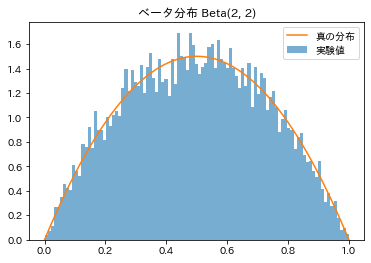

平均(実験値)	: 0.49658179071707975
平均(理論値)	: 0.5

分散(実験値)	: 0.05017471130658897
分散(理論値)	: 0.05


In [13]:
# ベータ分布パラメータ
a = 2; b = 2
result_beta = beta_ds(a, b)
# X = np.arange(0, 1, 0.01)
X = np.linspace(0, 1, 100)
plt.hist(result_beta, bins = X, density=True, alpha=0.6, label="実験値")

beta_pdf = stats.beta.pdf(x=X, a = a, b = b)
plt.plot(X, beta_pdf, label="真の分布")

plt.title(r"ベータ分布 Beta({}, {})".format(a, b))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_beta)))
print("平均(理論値)\t: {}".format(a/(a+b)))
print()
print("分散(実験値)\t: {}".format(np.var(result_beta)))
print("分散(理論値)\t: {}".format(a*b/((a+b)**2*(a+b+1))))

#### 精度比較

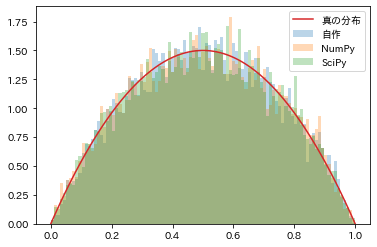

In [14]:
# ベータ分布パラメータ
a = 2; b = 2

# 乱数の生成数
N = N_default

# 自作のベータ分布乱数生成器
result_mybeta = beta_ds(a, b, N)
# NumPyのベータ分布乱数生成器
result_npbeta = np.random.beta(a, b, N)
# SciPyのベータ分布乱数生成器
result_spbeta = stats.beta.rvs(a, b, size = N)

X = np.linspace(0, 1, 100)
plt.hist(result_mybeta, bins=X, density=True, color="C0", alpha=0.3, label="自作")
plt.hist(result_npbeta, bins=X, density=True, color="C1", alpha=0.3, label="NumPy")
plt.hist(result_spbeta, bins=X, density=True, color="C2", alpha=0.3, label="SciPy")

plt.plot(X, stats.beta.pdf(x=X, a = a, b = b), color="C3", label="真の分布")
plt.legend()
plt.show()

In [15]:
# 平均の収束速度を比較

# ベータ分布パラメータ
a = 2; b = 2

ns = [10, 20, 40, 80, 160, 320, 640]
m = 100
my_std = np.empty(len(ns))
np_std = np.empty(len(ns))
sp_std = np.empty(len(ns))

for i in range(len(ns)):
    # 理論平均値との差
    my_diff = np.empty(m)
    np_diff = np.empty(m)
    sp_diff = np.empty(m)
    for j in range(m):
        my_diff[j] = a/(a+b)-np.mean(beta_ds(a, b, ns[i]))
        np_diff[j] = a/(a+b)-np.mean(np.random.beta(a, b, ns[i]))
        sp_diff[j] = a/(a+b)-np.mean(stats.beta.rvs(a, b, size = ns[i]))
    my_std[i] = np.std(my_diff)
    np_std[i] = np.std(np_diff)
    sp_std[i] = np.std(sp_diff)

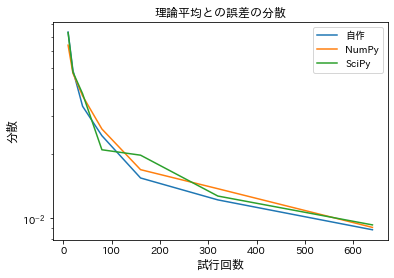

In [16]:
plt.plot(ns, my_std, color="C0", label="自作")
plt.plot(ns, np_std, color="C1", label="NumPy")
plt.plot(ns, sp_std, color="C2", label="SciPy")
plt.yscale('log')
plt.title("理論平均との誤差の分散")
plt.legend()
plt.ylabel("分散", fontsize=12)
plt.xlabel("試行回数", fontsize=12)
plt.show()

#### 速度比較

In [17]:
from time import time

# ベータ分布パラメータ
a = 2; b = 2

# 乱数の生成数
N = N_default

# 自作のベータ分布乱数生成器
start = time()
result_mybeta = beta_ds(a, b, N)
end = time()
time_mybeta = (end-start)/N

# NumPyのベータ分布乱数生成器
start = time()
result_npbeta = np.random.beta(a, b, N)
end = time()
time_npbeta = (end-start)/N

# SciPyのベータ分布乱数生成器
start = time()
result_spbeta = stats.beta.rvs(a, b, size = N)
end = time()
time_spbeta = (end-start)/N

print("自作\t:{:.16f}".format(time_mybeta) + "[sec]")
print("NumPy\t:{:.16f}".format(time_npbeta) + "[sec]")
print("SciPy\t:{:.16f}".format(time_spbeta) + "[sec]")

自作	:0.0001769426822662[sec]
NumPy	:0.0000001143693924[sec]
SciPy	:0.0000001304149628[sec]


In [18]:
# ベータ分布パラメータ
a = 2; b = 2

# 乱数の生成数
N = N_default*10

# 自作のベータ分布乱数生成器
time_my = np.empty(N)
for i in range(N):
    start = time()
    beta_ds(a, b, 1)
    end = time()
    time_my[i] = (end-start)

# NumPyのベータ分布乱数生成器
time_np = np.empty(N)
for i in range(N):
    start = time()
    np.random.beta(a, b, 1)
    end = time()
    time_np[i] = (end-start)

# SciPyのベータ分布乱数生成器
time_sp = np.empty(N)
for i in range(N):
    start = time()
    stats.beta.rvs(a, b)
    end = time()
    time_sp[i] = (end-start)

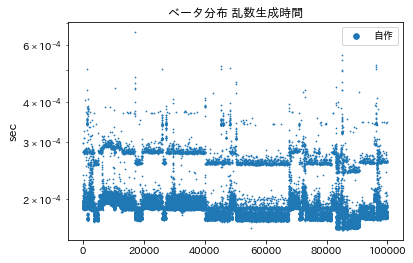

In [19]:
ns = range(1, N+1)
plt.scatter(ns, time_my, color="C0", s=0.5, label="自作")
plt.yscale('log')
plt.title("ベータ分布 乱数生成時間")
plt.legend(markerscale=8, loc="upper right")
plt.ylabel("sec", fontsize=12)
plt.show()

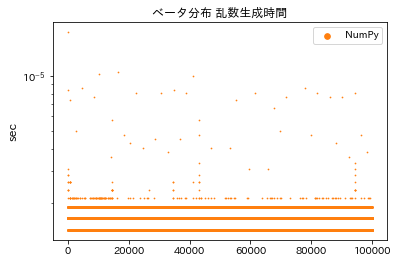

In [20]:
plt.scatter(ns, time_np, color="C1", s=0.5, label="NumPy")
plt.yscale('log')
plt.title("ベータ分布 乱数生成時間")
plt.legend(markerscale=8, loc="upper right")
plt.ylabel("sec", fontsize=12)
plt.show()

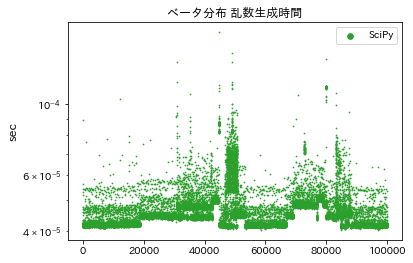

In [21]:
plt.scatter(ns, time_sp, color="C2", s=0.5, label="SciPy")
plt.yscale('log')
plt.title("ベータ分布 乱数生成時間")
plt.legend(markerscale=8, loc="upper right")
plt.ylabel("sec", fontsize=12)
plt.show()

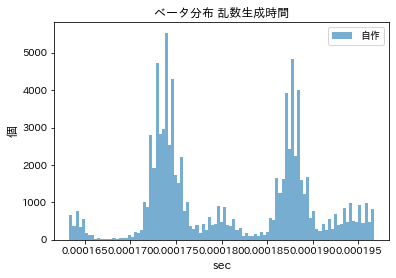

In [22]:
x = np.linspace(np.percentile(time_my, 1), np.percentile(time_my, 90), 100)
plt.hist(time_my, bins = x, alpha=0.6, color="C0", label="自作")
plt.title("ベータ分布 乱数生成時間")
plt.legend(markerscale=8, loc="upper right")
plt.xlabel("sec", fontsize=12)
plt.ylabel("個", fontsize=12)
plt.show()

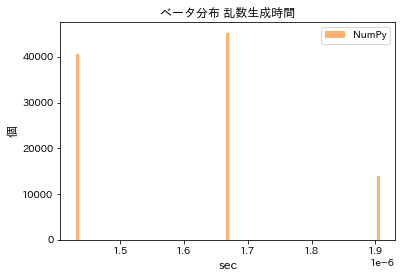

In [23]:
x = np.linspace(np.percentile(time_np, 1), np.percentile(time_np, 99), 100)
plt.hist(time_np, bins = x, alpha=0.6, color="C1", label="NumPy")
plt.title("ベータ分布 乱数生成時間")
plt.legend(markerscale=8, loc="upper right")
plt.xlabel("sec", fontsize=12)
plt.ylabel("個", fontsize=12)
plt.show()

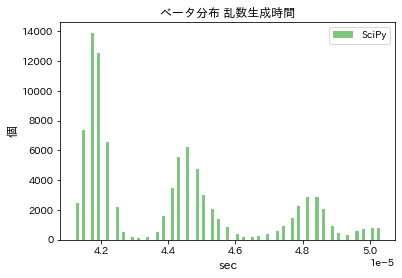

In [24]:
x = np.linspace(np.percentile(time_sp, 1), np.percentile(time_sp, 95), 100)
plt.hist(time_sp, bins = x, alpha=0.6, color="C2", label="SciPy")
plt.title("ベータ分布 乱数生成時間")
plt.legend(markerscale=8, loc="upper right")
plt.xlabel("sec", fontsize=12)
plt.ylabel("個", fontsize=12)
plt.show()

### 正規分布 N(m, s)

#### Box-Muller 法

In [25]:
# 正規分布 Norm(m, s)
def norm_ds_boxmuller(m = 0, s = 1, N = N_default):
    if not (s > 0):
        raise Exception("正規分布 N(m, s) において 0 < s < ∞")
    
    y = np.empty(N)
    for i in range(N//2):
        x1, x2 = stats.uniform.rvs(size = 2) # uniform_ds(N = 2)
        
        # z = np.sqrt(-2.0 * np.log(x1)) * np.sin(2.0*np.pi*x2) # Box-Muller 法
        z1 = np.sqrt(-2.0 * np.log(x1)) * np.sin(2.0*np.pi*x2)
        z2 = np.sqrt(-2.0 * np.log(x2)) * np.sin(2.0*np.pi*x1)
        y[2*i] = m + np.sqrt(s) * z1 # N(m, s) = s^0.5*N(0,1)+m を利用
        y[2*i+1] = m + np.sqrt(s) * z2
    
    if N%2 == 1:
        x1, x2 = stats.uniform.rvs(size = 2)
        z = np.sqrt(-2.0 * np.log(x1)) * np.sin(2.0*np.pi*x2)
        y[-1] = z
    
    return y

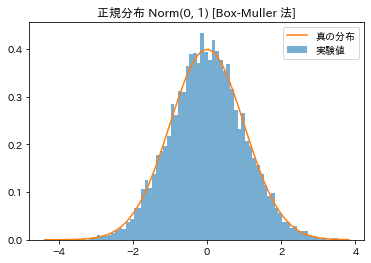

平均(実験値)	: -0.00046676984436389154
平均(理論値)	: 0

分散(実験値)	: 0.9933667713850631
分散(理論値)	: 1


In [26]:
# 正規分布パラメータ
m = 0; s = 1
result_norm = norm_ds_boxmuller(m, s, N_default)
X = np.arange(min(result_norm), max(result_norm), 0.1)
plt.hist(result_norm, bins=X, density=True, alpha=0.6, label="実験値")

norm_pdf = stats.norm.pdf(x=X, loc=m, scale=np.sqrt(s)) # scale は標準偏差
plt.plot(X, norm_pdf, label="真の分布")

plt.title(r"正規分布 Norm({}, {}) [Box-Muller 法]".format(m, s))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_norm)))
print("平均(理論値)\t: {}".format(m))
print()
print("分散(実験値)\t: {}".format(np.var(result_norm)))
print("分散(理論値)\t: {}".format(s))

#### Marsaglia (Polar) 法

In [27]:
# 正規分布 Norm(m, s)
def norm_ds_marsaglia(m = 0, s = 1, N = N_default):
    if not (s > 0):
        raise Exception("正規分布 N(m, s) において 0 < s < ∞")
    
    y = np.empty(N)
    for i in range(N//2):
        while True:
            u1, u2 = stats.uniform.rvs(loc = -1, scale = 2, size = 2) # uniform_ds(a = -1, b = 1, N = 2)
            ss = u1**2 + u2**2
            if ss <= 1:
                # Marsaglia (Polar) 法
                z1 = u1 * np.sqrt(-2*np.log(ss)/ss)
                z2 = u2 * np.sqrt(-2*np.log(ss)/ss)
                y[2*i] = m + np.sqrt(s) * z1 # N(m, s) = s^0.5*N(0,1)+m を利用
                y[2*i+1] = m + np.sqrt(s) * z2
                break
    
    if N%2 == 1:
        u1, u2 = stats.uniform.rvs(loc = -1, scale = 2, size = 2)
        ss = u1**2 + u2**2
        if ss <= 1:
            # Marsaglia (Polar) 法
            z1 = u1 * np.sqrt(-2*np.log(ss)/ss)
            y[-1] = m + np.sqrt(s) * z1
    
    return y

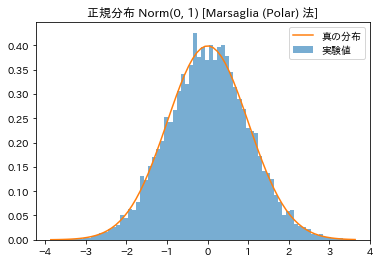

平均(実験値)	: 0.012464102395618694
平均(理論値)	: 0

分散(実験値)	: 0.9968227124566041
分散(理論値)	: 1


In [28]:
# 正規分布パラメータ
m = 0; s = 1
result_norm = norm_ds_marsaglia(m, s)
X = np.arange(min(result_norm), max(result_norm), 0.1)
plt.hist(result_norm, bins=X, density=True, alpha=0.6, label="実験値")

norm_pdf = stats.norm.pdf(x=X, loc=m, scale=np.sqrt(s))
plt.plot(X, norm_pdf, label="真の分布")

plt.title(r"正規分布 Norm({}, {}) [Marsaglia (Polar) 法]".format(m, s))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_norm)))
print("平均(理論値)\t: {}".format(m))
print()
print("分散(実験値)\t: {}".format(np.var(result_norm)))
print("分散(理論値)\t: {}".format(s))

#### Kinderman 法

In [29]:
# 正規分布 Norm(m, s)
def norm_ds_kinderman(m = 0, s = 1, N = N_default):
    if not (s > 0):
        raise Exception("正規分布 N(m, s) において 0 < s < ∞")
    
    y = np.empty(N)
    for i in range(N):
        while True:
            u1 = stats.uniform.rvs(loc = 0, scale = np.power(2*np.pi,-1/4))
            # u1 = uniform_ds(a = 0, b = np.power(2*np.pi,-1/4)) でも可
            u2 = stats.uniform.rvs(loc = -np.sqrt(np.sqrt(2/np.pi)/np.e),
                                   scale = 2*np.sqrt(np.sqrt(2/np.pi)/np.e))
            # u2 = uniform_ds(a = -np.sqrt(np.sqrt(2/np.pi)/np.e), b = np.sqrt(np.sqrt(2/np.pi)/np.e)) でも可
            
            if np.power(u2, 2)/np.power(u1, 2) + np.log(2*np.pi) <= -4*np.log(u1):
                z = u2 / u1 # Kinderman 法
                y[i] = m + np.sqrt(s) * z # N(m, s) = s^0.5*N(0,1)+m を利用
                break
    
    return y

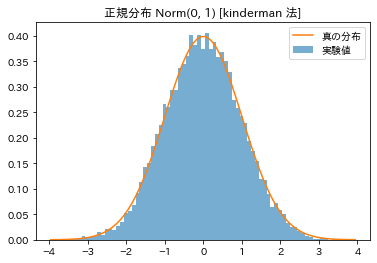

平均(実験値)	: -0.010894792371202987
平均(理論値)	: 0

分散(実験値)	: 0.9878217137364507
分散(理論値)	: 1


In [30]:
# 正規分布パラメータ
m = 0; s = 1
result_norm = norm_ds_kinderman(m, s)
X = np.arange(min(result_norm), max(result_norm), 0.1)
plt.hist(result_norm, bins=X, density=True, alpha=0.6, label="実験値")

norm_pdf = stats.norm.pdf(x=X, loc=m, scale=np.sqrt(s))
plt.plot(X, norm_pdf, label="真の分布")

plt.title(r"正規分布 Norm({}, {}) [kinderman 法]".format(m, s))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_norm)))
print("平均(理論値)\t: {}".format(m))
print()
print("分散(実験値)\t: {}".format(np.var(result_norm)))
print("分散(理論値)\t: {}".format(s))

### 対数正規分布 LN(m, s)

In [31]:
# 対数正規分布 LN(m, s)
def lognorm_ds(m, s, N = N_default):
    if s <= 0:
        raise Exception("対数正規分布 LN(m, s) において 0 < s < ∞")
    
    y = norm_ds_boxmuller(m, s, N)
    x = np.e ** y
    
    return x

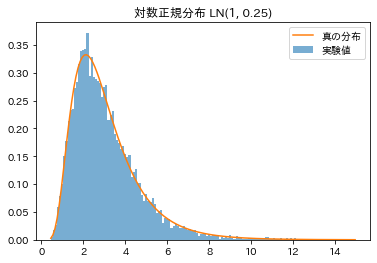

平均(実験値)	: 3.080731806828251
平均(理論値)	: 3.080216848918031

分散(実験値)	: 2.6896016013391044
分散(理論値)	: 2.6947581243449465


In [32]:
# 対数正規分布パラメータ
m = 1; s = 1/4
result_lognorm = lognorm_ds(m, s)
X = np.arange(min(result_lognorm), max(result_lognorm), 0.1)
plt.hist(result_lognorm, bins=X, density=True, alpha=0.6, label="実験値")

lognorm_pdf = stats.lognorm.pdf(x=X, s=s**0.5, scale=np.e**m)
plt.plot(X, lognorm_pdf, label="真の分布")

plt.title(r"対数正規分布 LN({}, {})".format(m, s))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_lognorm)))
print("平均(理論値)\t: {}".format(np.e**(m+s/2)))
print()
print("分散(実験値)\t: {}".format(np.var(result_lognorm)))
print("分散(理論値)\t: {}".format(np.e**(2*m+s) * (np.e**s-1)))

### カイ2乗分布 chi2(n)

#### ガンマ分布を利用

In [33]:
# カイ2乗分布 chi2(n)
# ガンマ分布を利用
def chi2_ds(n, N = N_default):
    return gamma_ds(n/2, 1/2, N)

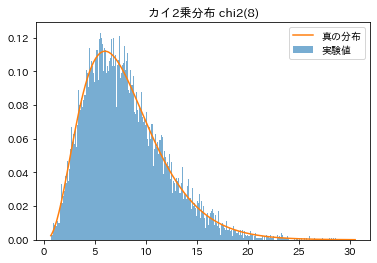

平均(実験値)	: 8.017881361398091
平均(理論値)	: 8

分散(実験値)	: 15.497352006464373
分散(理論値)	: 16


In [34]:
# カイ2乗分布パラメータ
n = 8
result_chi2 = chi2_ds(n)
X = np.arange(min(result_chi2), max(result_chi2), 0.1)
plt.hist(result_chi2, bins = X, density=True, alpha=0.6, label="実験値")

chi2_pdf = stats.chi2.pdf(x=X, df = n)
plt.plot(X, chi2_pdf, label="真の分布")

plt.title(r"カイ2乗分布 chi2({})".format(n))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_chi2)))
print("平均(理論値)\t: {}".format(n))
print()
print("分散(実験値)\t: {}".format(np.var(result_chi2)))
print("分散(理論値)\t: {}".format(2*n))

#### 標準正規分布を利用

In [35]:
# カイ2乗分布 chi2(n)
# 標準正規分布を利用
def chi2_ds(n, N = N_default):
    y = np.empty(N)
    for i in range(N):
        y[i] = np.sum(norm_ds_boxmuller(N = n)**2)
    return y

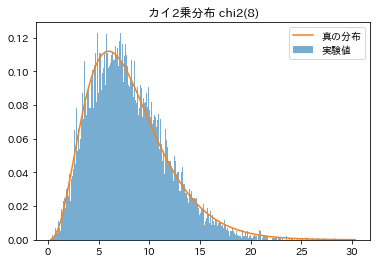

平均(実験値)	: 7.966747222247013
平均(理論値)	: 8

分散(実験値)	: 14.29129909889487
分散(理論値)	: 16


In [36]:
# カイ2乗分布パラメータ
n = 8
result_chi2 = chi2_ds(n)
X = np.arange(min(result_chi2), max(result_chi2), 0.1)
plt.hist(result_chi2, bins = X, density=True, alpha=0.6, label="実験値")

chi2_pdf = stats.chi2.pdf(x=X, df = n)
plt.plot(X, chi2_pdf, label="真の分布")

plt.title(r"カイ2乗分布 chi2({})".format(n))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_chi2)))
print("平均(理論値)\t: {}".format(n))
print()
print("分散(実験値)\t: {}".format(np.var(result_chi2)))
print("分散(理論値)\t: {}".format(2*n))

### t分布

In [37]:
# t分布 t(n)
# 定義のまま N(0,1)とchi2(n) を利用
def t_ds(n, N = N_default):
    x = norm_ds_boxmuller(0, 1, N)
    y = chi2_ds(n, N)
    
    return x/np.sqrt(y/n)

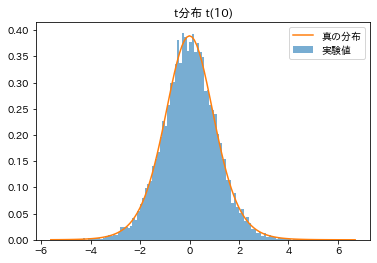

理論値において平均は パラメータ n >= 2, 分散は パラメータ n >= 3 のときのみ
平均(実験値)	: 0.0003181534595407147
平均(理論値)	: 0

分散(実験値)	: 1.2374617308617213
分散(理論値)	: 1.25


In [38]:
# t分布パラメータ
n = 10
result_t = t_ds(n)
X = np.arange(min(result_t), max(result_t), 0.1)
plt.hist(result_t, bins = X, density=True, alpha=0.6, label="実験値")

t_pdf = stats.t.pdf(x=X, df = n)
plt.plot(X, t_pdf, label="真の分布")

plt.title(r"t分布 t({})".format(n))
plt.legend()
plt.show()

print("理論値において平均は パラメータ n >= 2, 分散は パラメータ n >= 3 のときのみ")
print("平均(実験値)\t: {}".format(np.mean(result_t)))
print("平均(理論値)\t: {}".format(0))
print()
print("分散(実験値)\t: {}".format(np.var(result_t)))
print("分散(理論値)\t: {}".format(n/(n-2)))

### F分布

In [39]:
# F分布 F(m, n)
# 定義のまま chi2(m), chi2(n) を利用
def f_ds(m, n, N = N_default):
    x = chi2_ds(m, N)
    y = chi2_ds(n, N)
    
    return (x/m)/(y/n)

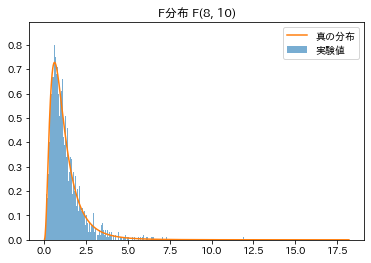

理論値において平均は パラメータ n >= 3, 分散は パラメータ n >= 5 のときのみ
平均(実験値)	: 1.2342433511794924
平均(理論値)	: 1.25
分散(実験値)	: 0.9405508036403247
分散(理論値)	: 1.0416666666666667


In [40]:
# F分布パラメータ
m = 8; n = 10
result_f = f_ds(m, n)
X = np.arange(min(result_f), max(result_f), 0.01)
plt.hist(result_f, bins = X, density=True, alpha=0.6, label="実験値")

f_pdf = stats.f.pdf(x=X, dfn=m, dfd=n)
plt.plot(X, f_pdf, label="真の分布")

plt.title(r"F分布 F({}, {})".format(m, n))
plt.legend()
plt.show()

print("理論値において平均は パラメータ n >= 3, 分散は パラメータ n >= 5 のときのみ")
print("平均(実験値)\t: {}".format(np.mean(result_f)))
print("平均(理論値)\t: {}".format(n/(n-2)))
print("分散(実験値)\t: {}".format(np.var(result_f)))
print("分散(理論値)\t: {}".format(2*n**2*(m+n-2)/(m*(n-2)**2*(n-4))))

### ベルヌーイ分布 Bern(p)

In [41]:
# ベルヌーイ分布 Bern(p)
def bern_ds(p, N = N_default):
    if p <= 0 and 1 <= p:
        raise Exception("ベルヌーイ分布 Bern(p) において 0 < p < 1")
    
    y = np.empty(N)
    for i in range(N):
        x = stats.uniform.rvs()
        if x <= p:
            y[i] = 1
        else:
            y[i] = 0
    
    return y

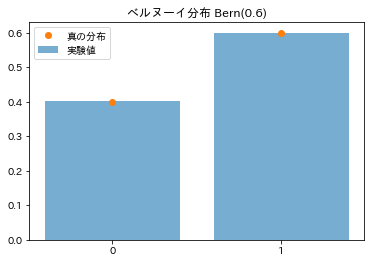

In [42]:
# ベルヌーイ分布パラメータ
p = 0.6
result_bern = bern_ds(p)
plt.hist(result_bern, bins = [-0.5, 0.5, 1.5], rwidth = 0.8, density=True, alpha=0.6, label="実験値")

X = np.array([0, 1])
bern_pmf = stats.bernoulli.pmf(X, p)
plt.plot(X, bern_pmf, "o", label="真の分布")

plt.xticks(X)
plt.title(r"ベルヌーイ分布 Bern({})".format(p))
plt.legend()
plt.show()

### 二項分布 Bin(n, p)

In [43]:
# 二項分布 Bin(n, p)
def bin_ds(n, p, N = N_default):
    if not (0 < p and p < 1):
        raise Exception("二項分布 Bin(n, p) において 0 < p < 1")
    if not (type(n) is int and 0 < n):
        raise Exception("二項分布 Bern(n, p) において n ∈ N")
    
    x = np.empty(N)
    for i in range(N):
        x[i] = np.sum(bern_ds(p, n))
    
    return x

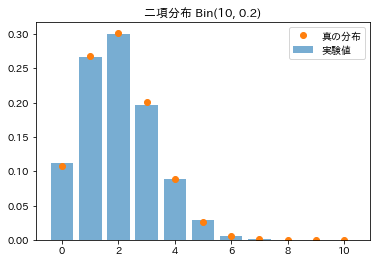

平均(実験値)	: 1.9986
平均(理論値)	: 2.0

分散(実験値)	: 1.6391980399999997
分散(理論値)	: 1.6


In [44]:
# 二項分布パラメータ
n = 10; p = 0.2
result_bin = bin_ds(n, p)
X = [-0.5 + i for i in range(n+2)]
plt.hist(result_bin, bins=X, rwidth = 0.8, density=True, alpha=0.6, label="実験値")

X = [i for i in range(n+1)]
bin_pmf = stats.binom.pmf(X, n, p)
plt.plot(X, bin_pmf, "o", label="真の分布")

plt.title(r"二項分布 Bin({}, {})".format(n, p))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_bin)))
print("平均(理論値)\t: {}".format(n*p))
print()
print("分散(実験値)\t: {}".format(np.var(result_bin)))
print("分散(理論値)\t: {}".format(n*p*(1-p)))

#### 二項分布の再生性

$ Bin(m, p)+Bin(n, p) = Bin(m+n, p) $

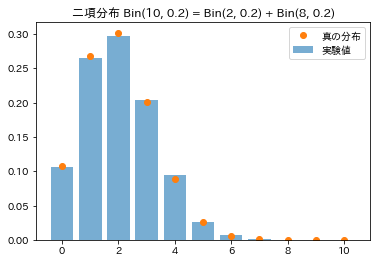

平均(実験値)	: 2.0238
平均(理論値)	: 2.0

分散(実験値)	: 1.6414335600000003
分散(理論値)	: 1.6


In [45]:
# 二項分布パラメータ
n1 = 2; n2 = 8; p = 0.2
n = n1 + n2

result_bin1 = bin_ds(n1, p)
result_bin2 = bin_ds(n2, p)

result_bin = result_bin1 + result_bin2

X = [-0.5 + i for i in range(n+2)]
plt.hist(result_bin, bins=X, rwidth = 0.8, density=True, alpha=0.6, label="実験値")

X = [i for i in range(n+1)]
bin_pmf = stats.binom.pmf(X, n, p)
plt.plot(X, bin_pmf, "o", label="真の分布")

plt.title(r"二項分布 Bin({}, {}) = Bin({}, {}) + Bin({}, {})".format(n, p, n1, p, n2, p))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_bin)))
print("平均(理論値)\t: {}".format(n*p))
print()
print("分散(実験値)\t: {}".format(np.var(result_bin)))
print("分散(理論値)\t: {}".format(n*p*(1-p)))

### ポアソン分布 Po(λ)

#### 指数分布を利用

In [46]:
# ポアソン分布 Po(m)
# 指数分布との関係を利用
def po_ds(m, N = N_default):
    if not (0 < m):
        raise Exception("ポアソン分布 Po(m) において 0 < m")
    
    x = np.empty(N)
    for i in range(N):
        s = 0
        cnt = 0
        while True:
            s = s + exp_ds(m, N = 1)
            if s >= 1:
                break
            cnt = cnt + 1
        x[i] = cnt
    
    return x

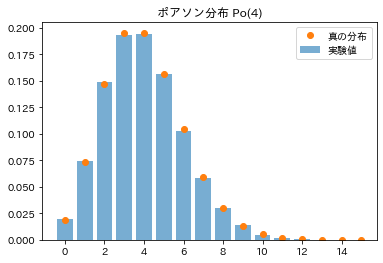

平均(実験値)	: 3.9851
平均(理論値)	: 4

分散(実験値)	: 4.01967799
分散(理論値)	: 4


In [47]:
# ポアソン分布パラメータ
m = 4
result_po = po_ds(m)
X = [-0.5 + i for i in range(int(max(result_po))+1)]
plt.hist(result_po, bins=X, rwidth = 0.8, density=True, alpha=0.6, label="実験値")

X = [i for i in range(int(max(result_po))+1)]
po_pmf = stats.poisson.pmf(X, m)
plt.plot(X, po_pmf, "o", label="真の分布")

plt.title(r"ポアソン分布 Po({})".format(m))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_po)))
print("平均(理論値)\t: {}".format(m))
print()
print("分散(実験値)\t: {}".format(np.var(result_po)))
print("分散(理論値)\t: {}".format(m))

#### 二項分布のポアソン近似

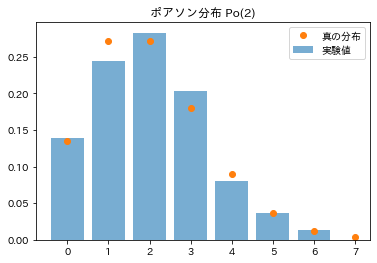

平均(実験値)	: 2.015
平均(理論値)	: 2

分散(実験値)	: 1.9207750000000001
分散(理論値)	: 2


In [48]:
# ポアソン分布パラメータ
m = 2
# 二項分布のパラメータ
n = 100

result_po = bin_ds(n, m/n, N_default//10) # 二項分布のポアソン近似
X = [-0.5 + i for i in range(int(max(result_po))+1)]
plt.hist(result_po, bins=X, rwidth = 0.8, density=True, alpha=0.6, label="実験値")

X = [i for i in range(int(max(result_po))+1)]
po_pmf = stats.poisson.pmf(X, m)
plt.plot(X, po_pmf, "o", label="真の分布")

plt.title(r"ポアソン分布 Po({})".format(m))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_po)))
print("平均(理論値)\t: {}".format(m))
print()
print("分散(実験値)\t: {}".format(np.var(result_po)))
print("分散(理論値)\t: {}".format(m))

####  Knuth

In [49]:
# ポアソン分布 Po(m)
# Knuth
def po_ds_knuth(m, N = N_default):
    if not (0 < m):
        raise Exception("ポアソン分布 Po(m) において 0 < m")
    
    y = np.empty(N)
    L = np.power(np.e, -m)
    for i in range(N):
        k = 0
        p = 1
        while True:
            k = k+1
            p = p*stats.uniform.rvs(0, 1)
            if not(p > L):
                break
        y[i] = k-1
    
    return y

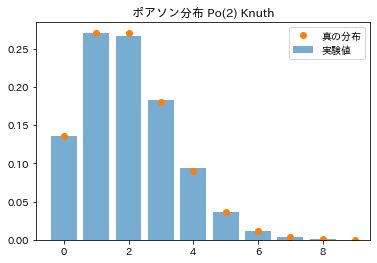

平均(実験値)	: 2.0041
平均(理論値)	: 2

分散(実験値)	: 2.00088319
分散(理論値)	: 2


In [50]:
# ポアソン分布パラメータ
m = 2
result_po_knuth = po_ds_knuth(m)
X = [-0.5 + i for i in range(int(max(result_po_knuth))+1)]
plt.hist(result_po_knuth, bins=X, rwidth = 0.8, density=True, alpha=0.6, label="実験値")

X = [i for i in range(int(max(result_po_knuth))+1)]
po_pmf = stats.poisson.pmf(X, m)
plt.plot(X, po_pmf, "o", label="真の分布")

plt.title(r"ポアソン分布 Po({}) Knuth".format(m))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_po_knuth)))
print("平均(理論値)\t: {}".format(m))
print()
print("分散(実験値)\t: {}".format(np.var(result_po_knuth)))
print("分散(理論値)\t: {}".format(m))

#### Junhao, based on Knuth

In [51]:
# ポアソン分布 Po(m)
# Junhao, based on Knuth
def po_ds_junhao(m, N = N_default, step = 500):
    if not (0 < m):
        raise Exception("ポアソン分布 Po(m) において 0 < m")
    
    y = np.empty(N)
    for i in range(N):
        m_left = m
        k = 0
        p = 1
        while True:
            k = k+1
            p = p*stats.uniform.rvs(0, 1)
            while p < 1 and m_left > 0:
                if m_left > step:
                    p = p*np.power(np.e, step)
                    m_left = m_left-step
                else:
                    p = p*np.power(np.e, m_left)
                    m_left = 0
            
            if not(p > 1):
                break
        
        y[i] = k-1
    
    return y

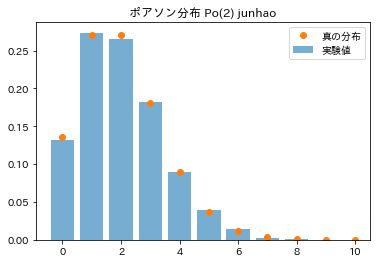

平均(実験値)	: 2.016
平均(理論値)	: 2

分散(実験値)	: 2.0163439999999997
分散(理論値)	: 2


In [52]:
# ポアソン分布パラメータ
m = 2
result_po_junhao = po_ds_junhao(m)
X = [-0.5 + i for i in range(int(max(result_po_knuth))+1)]
plt.hist(result_po_junhao, bins=X, rwidth = 0.8, density=True, alpha=0.6, label="実験値")

X = [i for i in range(int(max(result_po_junhao))+1)]
po_pmf = stats.poisson.pmf(X, m)
plt.plot(X, po_pmf, "o", label="真の分布")

plt.title(r"ポアソン分布 Po({}) junhao".format(m))
plt.legend()
plt.show()

print("平均(実験値)\t: {}".format(np.mean(result_po_junhao)))
print("平均(理論値)\t: {}".format(m))
print()
print("分散(実験値)\t: {}".format(np.var(result_po_junhao)))
print("分散(理論値)\t: {}".format(m))